# Importing Libraries and Dataset

In [80]:
from datetime import datetime
import os
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import tensorflow.keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from scipy import signal
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
pwd

'/home/ajay/Interview.-Machine_Learning'

In [82]:
data =pd.read_excel('/home/ajay/Interview.-Machine_Learning/Training Data.xlsx')

In [83]:
data2=data

# Making Data fit for Neural Network

In [84]:
data2

,Interviewer Name,Interviwer qualification,Interviwer Experience,Interviewer Age,Interviwer Skills,Interviwer Nationality,Interviewer Location,candidate,candidate qualification,candidate Experience,...,candidate Skills,candidate Nationality,candidate Location,Interview Month,Interview time,Mode,Result,1st Year Performance,Failed Candidate Career Progression,Unnamed: 20
0,I1,B.Tech,5,28,"OIC, OCI",US,Atlanta,C1,BS,5,...,"OIC, OCI",US,Atlanta,January,09:00:00,Video,Pass,Outstanding,NaN,NaN
1,I2,BSc,10,35,HCM Cloud,India,Bangalore,C2,B.Tech,8,...,HCM Cloud,India,Bangalore,February,10:00:00,Video,Fail,NaN,Joined superior competition at higher level,NaN
2,I3,MBA,15,45,ERP Cloud,India,Hyderabad,C3,MBA,13,...,ERP Cloud,India,Hyderabad,February,10:00:00,Video,Pass,Meets Expectations,NaN,NaN
3,I4,MCA,5,30,CX Cloud,US,New York,C4,MS,5,...,CX Cloud,US,New York,March,12:00:00,Face to Face,Fail,NaN,Joined inferior competition at the same/lower ...,NaN
4,I5,Bcom,7,32,SCM Cloud,India,Mumbai,C5,B.Tech,6,...,SCM Cloud,India,Mumbai,March,14:00:00,Video,Fail,NaN,Stayed in current company - promoted,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,I16,B.Tech,10,38,"OIC, OCI",US,Atlanta,C496,MS,7,...,"OIC, OCI",US,Atlanta,November,11:00:00,Video,Pass,Outstanding,NaN,NaN
496,I17,BSc,16,51,HCM Cloud,India,Bangalore,C497,MBA,9,...,HCM Cloud,India,Bangalore,December,11:30:00,Video,Fail,NaN,Joined inferior competition at the same/lower ...,NaN
497,I18,MBA,8,30,ERP Cloud,India,Hyderabad,C498,MCA,14,...,ERP Cloud,India,Hyderabad,December,09:00:00,Face to Face,Pass,Outstanding,NaN,NaN
498,I19,MCA,6,27,CX Cloud,US,New York,C499,MS,12,...,CX Cloud,US,New York,December,15:30:00,Face to Face,Fail,NaN,Joined superior competition at the same/lower ...,NaN


In [85]:
data2 = data2.iloc[: , :-1]
data2 = data2.iloc[: , :-1]
data2 = data2.iloc[: , :-1]

In [86]:
column="Interviwer Experience"
data2[column]=data2[column]/data2[column].abs().max()
column="Interviewer Age"
data2[column]=data2[column]/data2[column].abs().max()
column="candidate Experience"
data2[column]=data2[column]/data2[column].abs().max()
column="candidate Age"
data2[column]=data2[column]/data2[column].abs().max()

In [87]:
one_hot = pd.get_dummies(data2['Interviwer Nationality'])
data2 = data2.drop('Interviwer Nationality',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'India': 'Indian Interviewer', 'US': 'American Intervierwer'}, inplace = False)
one_hot = pd.get_dummies(data2['candidate Nationality'])
data2 = data2.drop('candidate Nationality',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'India': 'Indian Candidate', 'US': 'American Candidate'}, inplace = False)
one_hot = pd.get_dummies(data2['Mode'])
data2 = data2.drop('Mode',axis = 1)
data2 = data2.join(one_hot)
data2['Interview Month'].replace({"January": "Q1", "February":"Q1","March":"Q1","April":"Q2","May":"Q2","June":"Q2","July":"Q3","August":"Q3","September":"Q3","October":"Q4","November":"Q4","December":"Q4"}, inplace=True)
one_hot = pd.get_dummies(data2['Interview Month'])
data2 = data2.drop('Interview Month',axis = 1)
data2 = data2.join(one_hot)

In [88]:
data2 = data2.drop('Interviewer Name',axis = 1)
data2 = data2.drop('candidate',axis = 1)
data2 = data2.drop('Interviewer Location',axis = 1)
data2 = data2.drop('candidate Location',axis = 1)

In [89]:
data2['Interviwer  qualification'].replace({"BSc": 0.2, "Bcom": 0.4,"MCA":0.6,'B.Tech':0.8,"MBA":1}, inplace=True)
data2['candidate  qualification'].replace({"BS": 0.2, "MCA": 0.4,"B.Tech":0.6,'MS':0.8,"MBA":1}, inplace=True)

In [90]:
one_hot = pd.get_dummies(data2['Interviwer Skills'])
data2 = data2.drop('Interviwer Skills',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'CX Cloud': 'CX Cloud(I)', 'ERP Cloud': 'ERP Cloud(I)','HCM Cloud':'HCM Cloud(I)','OIC, OCI':'OIC, OCI(I)','SCM Cloud':'SCM Cloud(I)'}, inplace = False)
one_hot = pd.get_dummies(data2['candidate Skills'])
data2 = data2.drop('candidate Skills',axis = 1)
data2 = data2.join(one_hot)
data2=data2.rename(columns = {'CX Cloud': 'CX Cloud(C)', 'ERP Cloud': 'ERP Cloud(C)','HCM Cloud':'HCM Cloud(C)','OIC, OCI':'OIC, OCI(C)','SCM Cloud':'SCM Cloud(C)'}, inplace = False)

In [91]:
time_list=data2["Interview time"].tolist()
l=[]
for item in time_list:
    l.append(str(item))
data2['Interview time']=l
data2['Interview time'].replace({'08:00:00':'Morning', '09:00:00':'Morning', '10:00:00':'Morning', '10:30:00':'Morning', '11:00:00':'Morning','11:30:00':'Morning', '12:00:00':'Morning', '12:30:00':'Afternoon', '13:00:00':'Afternoon', '13:30:00':'Afternoon','14:00:00':'Afternoon', '14:30:00':'Afternoon', '15:00:00':'Afternoon', '15:30:00':'Afternoon', '16:00:00':'Afternoon','17:00:00':'Evening', '17:30:00':'Evening', '18:00:00':'Evening', '19:00:00':'Evening', '20:00:00':'Evening','21:00:00':'Evening'}, inplace=True)
one_hot = pd.get_dummies(data2['Interview time'])
data2 = data2.drop('Interview time',axis = 1)
data2 = data2.join(one_hot)

In [92]:
#data2['Result'].replace({"Pass": 1, "Fail":0}, inplace=True)
one_hot = pd.get_dummies(data2['Result'])
data2 = data2.drop('Result',axis = 1)
data2 = data2.join(one_hot)

In [93]:
data2

,Interviwer qualification,Interviwer Experience,Interviewer Age,candidate qualification,candidate Experience,candidate Age,Indian Interviewer,American Intervierwer,Indian Candidate,American Candidate,...,CX Cloud(C),ERP Cloud(C),HCM Cloud(C),"OIC, OCI(C)",SCM Cloud(C),Afternoon,Evening,Morning,Fail,Pass
0,0.8,0.277778,0.549020,0.2,0.357143,0.604651,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
1,0.2,0.555556,0.686275,0.6,0.571429,0.767442,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,1.0,0.833333,0.882353,1.0,0.928571,0.976744,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
3,0.6,0.277778,0.588235,0.8,0.357143,0.674419,0,1,0,1,...,1,0,0,0,0,0,0,1,1,0
4,0.4,0.388889,0.627451,0.6,0.428571,0.720930,1,0,1,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.8,0.555556,0.745098,0.8,0.500000,0.767442,0,1,0,1,...,0,0,0,1,0,0,0,1,0,1
496,0.2,0.888889,1.000000,1.0,0.642857,0.720930,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
497,1.0,0.444444,0.588235,0.4,1.000000,0.813953,1,0,1,0,...,0,1,0,0,0,0,0,1,0,1
498,0.6,0.333333,0.529412,0.8,0.857143,0.744186,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0


# Test train Split

In [94]:
#target=data2['Result']
#target=target.to_numpy()
#data2 = data2.drop('Result',axis = 1)
#data2=data2.to_numpy()
target=data2.iloc[:,[29,30]]
data2=data2.drop('Pass',axis=1)
data2=data2.drop('Fail',axis=1)
x_train, x_test, y_train, y_test = train_test_split(data2, target,test_size=0.2, random_state = 42)

# Model Definition 

In [102]:
model= Sequential()
model.add(Dense(256,input_shape=(29,)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='sigmoid'))

In [109]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.000060)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= optimizer)

In [110]:
model.summary()

score = model.evaluate(x_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 256)               7680      
_________________________________________________________________
dropout_20 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 258       
Total params: 40,834
Trainable params: 40,834
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 1ms/step - loss: 0.6211 - accuracy: 0.6700
Pre-training accuracy: 67.0000%

# Training and Evaluation

In [111]:
num_epochs = 1000
num_batch_size = 1
start = datetime.now()

history=model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs,validation_data=(x_test, y_test),  verbose=1)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.6274 - accuracy: 0.6475 - val_loss: 0.6229 - val_accuracy: 0.6300
Epoch 2/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.6275 - accuracy: 0.6425 - val_loss: 0.6193 - val_accuracy: 0.6800
Epoch 3/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.6172 - accuracy: 0.6575 - val_loss: 0.6176 - val_accuracy: 0.6700
Epoch 4/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.6224 - accuracy: 0.6700 - val_loss: 0.6203 - val_accuracy: 0.6700
Epoch 5/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.6114 - accuracy: 0.6725 - val_loss: 0.6187 - val_accuracy: 0.6800
Epoch 6/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.6019 - accuracy: 0.6575 - val_loss: 0.6184 - val_accuracy: 0.6800
Epoch 7/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.6259 - accuracy: 0.6325 - val_loss: 0.6160 - val_accuracy:

400/400 [==============================] - 0s 1ms/step - loss: 0.5476 - accuracy: 0.7225 - val_loss: 0.6210 - val_accuracy: 0.6700
Epoch 58/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5601 - accuracy: 0.6975 - val_loss: 0.6225 - val_accuracy: 0.6500
Epoch 59/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.7125 - val_loss: 0.6219 - val_accuracy: 0.6500
Epoch 60/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5457 - accuracy: 0.7150 - val_loss: 0.6233 - val_accuracy: 0.6400
Epoch 61/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.7075 - val_loss: 0.6237 - val_accuracy: 0.6500
Epoch 62/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.7475 - val_loss: 0.6180 - val_accuracy: 0.6400
Epoch 63/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5349 - accuracy: 0.7050 - val_loss: 0.6203 - val_accuracy: 0.6500

400/400 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7025 - val_loss: 0.6210 - val_accuracy: 0.6200
Epoch 114/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5191 - accuracy: 0.7125 - val_loss: 0.6235 - val_accuracy: 0.6200
Epoch 115/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.7150 - val_loss: 0.6262 - val_accuracy: 0.6300
Epoch 116/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7475 - val_loss: 0.6254 - val_accuracy: 0.6300
Epoch 117/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7175 - val_loss: 0.6238 - val_accuracy: 0.6400
Epoch 118/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.7075 - val_loss: 0.6249 - val_accuracy: 0.6300
Epoch 119/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5230 - accuracy: 0.7150 - val_loss: 0.6271 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7275 - val_loss: 0.6290 - val_accuracy: 0.6400
Epoch 170/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4762 - accuracy: 0.7375 - val_loss: 0.6285 - val_accuracy: 0.6400
Epoch 171/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4972 - accuracy: 0.7525 - val_loss: 0.6276 - val_accuracy: 0.6300
Epoch 172/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7325 - val_loss: 0.6299 - val_accuracy: 0.6200
Epoch 173/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4956 - accuracy: 0.7275 - val_loss: 0.6301 - val_accuracy: 0.6300
Epoch 174/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7400 - val_loss: 0.6364 - val_accuracy: 0.6400
Epoch 175/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4922 - accuracy: 0.7675 - val_loss: 0.6339 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4939 - accuracy: 0.7225 - val_loss: 0.6267 - val_accuracy: 0.6600
Epoch 226/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7400 - val_loss: 0.6273 - val_accuracy: 0.6700
Epoch 227/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7600 - val_loss: 0.6240 - val_accuracy: 0.6400
Epoch 228/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4911 - accuracy: 0.7375 - val_loss: 0.6276 - val_accuracy: 0.6300
Epoch 229/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.7250 - val_loss: 0.6353 - val_accuracy: 0.6500
Epoch 230/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4783 - accuracy: 0.7350 - val_loss: 0.6351 - val_accuracy: 0.6400
Epoch 231/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.7225 - val_loss: 0.6297 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4899 - accuracy: 0.7200 - val_loss: 0.6199 - val_accuracy: 0.6500
Epoch 282/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4867 - accuracy: 0.7275 - val_loss: 0.6192 - val_accuracy: 0.6600
Epoch 283/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4947 - accuracy: 0.7200 - val_loss: 0.6242 - val_accuracy: 0.6500
Epoch 284/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7550 - val_loss: 0.6221 - val_accuracy: 0.6300
Epoch 285/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4749 - accuracy: 0.7500 - val_loss: 0.6221 - val_accuracy: 0.6500
Epoch 286/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4835 - accuracy: 0.7350 - val_loss: 0.6219 - val_accuracy: 0.6800
Epoch 287/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4903 - accuracy: 0.7350 - val_loss: 0.6272 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4659 - accuracy: 0.7525 - val_loss: 0.6291 - val_accuracy: 0.6200
Epoch 338/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7150 - val_loss: 0.6308 - val_accuracy: 0.6300
Epoch 339/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4643 - accuracy: 0.7375 - val_loss: 0.6271 - val_accuracy: 0.6500
Epoch 340/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4693 - accuracy: 0.7425 - val_loss: 0.6324 - val_accuracy: 0.6100
Epoch 341/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4662 - accuracy: 0.7425 - val_loss: 0.6337 - val_accuracy: 0.6300
Epoch 342/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4826 - accuracy: 0.7275 - val_loss: 0.6322 - val_accuracy: 0.6200
Epoch 343/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.7500 - val_loss: 0.6295 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.7300 - val_loss: 0.6303 - val_accuracy: 0.6400
Epoch 394/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4544 - accuracy: 0.7625 - val_loss: 0.6369 - val_accuracy: 0.6300
Epoch 395/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4694 - accuracy: 0.7325 - val_loss: 0.6399 - val_accuracy: 0.6300
Epoch 396/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4637 - accuracy: 0.7500 - val_loss: 0.6326 - val_accuracy: 0.6300
Epoch 397/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.7775 - val_loss: 0.6384 - val_accuracy: 0.6600
Epoch 398/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4818 - accuracy: 0.7275 - val_loss: 0.6360 - val_accuracy: 0.6100
Epoch 399/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7450 - val_loss: 0.6340 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4479 - accuracy: 0.7600 - val_loss: 0.6367 - val_accuracy: 0.6800
Epoch 450/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.7525 - val_loss: 0.6369 - val_accuracy: 0.6800
Epoch 451/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4681 - accuracy: 0.7500 - val_loss: 0.6358 - val_accuracy: 0.7100
Epoch 452/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4606 - accuracy: 0.7575 - val_loss: 0.6357 - val_accuracy: 0.6800
Epoch 453/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4703 - accuracy: 0.7400 - val_loss: 0.6387 - val_accuracy: 0.6800
Epoch 454/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7550 - val_loss: 0.6334 - val_accuracy: 0.6800
Epoch 455/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.7325 - val_loss: 0.6338 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4601 - accuracy: 0.7550 - val_loss: 0.6402 - val_accuracy: 0.6800
Epoch 506/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4761 - accuracy: 0.7425 - val_loss: 0.6392 - val_accuracy: 0.6900
Epoch 507/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.7550 - val_loss: 0.6421 - val_accuracy: 0.6700
Epoch 508/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4532 - accuracy: 0.7375 - val_loss: 0.6464 - val_accuracy: 0.6600
Epoch 509/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.4639 - accuracy: 0.7300 - val_loss: 0.6504 - val_accuracy: 0.6600
Epoch 510/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7650 - val_loss: 0.6393 - val_accuracy: 0.6600
Epoch 511/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4598 - accuracy: 0.7725 - val_loss: 0.6439 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4497 - accuracy: 0.7700 - val_loss: 0.6454 - val_accuracy: 0.6600
Epoch 562/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.7625 - val_loss: 0.6539 - val_accuracy: 0.6800
Epoch 563/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4462 - accuracy: 0.7750 - val_loss: 0.6534 - val_accuracy: 0.6700
Epoch 564/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7600 - val_loss: 0.6603 - val_accuracy: 0.6500
Epoch 565/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.7825 - val_loss: 0.6597 - val_accuracy: 0.6400
Epoch 566/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.7775 - val_loss: 0.6563 - val_accuracy: 0.6500
Epoch 567/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.7575 - val_loss: 0.6598 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4478 - accuracy: 0.7500 - val_loss: 0.6516 - val_accuracy: 0.6700
Epoch 618/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4501 - accuracy: 0.7450 - val_loss: 0.6519 - val_accuracy: 0.6600
Epoch 619/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.7600 - val_loss: 0.6537 - val_accuracy: 0.6700
Epoch 620/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7525 - val_loss: 0.6497 - val_accuracy: 0.6700
Epoch 621/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4526 - accuracy: 0.7625 - val_loss: 0.6461 - val_accuracy: 0.6700
Epoch 622/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4491 - accuracy: 0.7650 - val_loss: 0.6421 - val_accuracy: 0.6800
Epoch 623/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4308 - accuracy: 0.7700 - val_loss: 0.6490 - val_accuracy: 

400/400 [==============================] - 1s 1ms/step - loss: 0.4549 - accuracy: 0.7625 - val_loss: 0.6528 - val_accuracy: 0.6800
Epoch 674/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.4295 - accuracy: 0.7625 - val_loss: 0.6537 - val_accuracy: 0.6800
Epoch 675/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.4529 - accuracy: 0.7475 - val_loss: 0.6543 - val_accuracy: 0.6900
Epoch 676/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.4342 - accuracy: 0.7625 - val_loss: 0.6633 - val_accuracy: 0.6700
Epoch 677/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.4367 - accuracy: 0.7750 - val_loss: 0.6625 - val_accuracy: 0.6700
Epoch 678/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.4394 - accuracy: 0.7550 - val_loss: 0.6611 - val_accuracy: 0.6700
Epoch 679/1000
400/400 [==============================] - 1s 1ms/step - loss: 0.4575 - accuracy: 0.7375 - val_loss: 0.6663 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7750 - val_loss: 0.6580 - val_accuracy: 0.6800
Epoch 730/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4540 - accuracy: 0.7600 - val_loss: 0.6585 - val_accuracy: 0.6800
Epoch 731/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7675 - val_loss: 0.6618 - val_accuracy: 0.6800
Epoch 732/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7775 - val_loss: 0.6619 - val_accuracy: 0.6800
Epoch 733/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.7475 - val_loss: 0.6623 - val_accuracy: 0.6800
Epoch 734/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.7650 - val_loss: 0.6613 - val_accuracy: 0.6800
Epoch 735/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7625 - val_loss: 0.6706 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.7575 - val_loss: 0.6667 - val_accuracy: 0.6900
Epoch 786/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4408 - accuracy: 0.7625 - val_loss: 0.6664 - val_accuracy: 0.6900
Epoch 787/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.7450 - val_loss: 0.6663 - val_accuracy: 0.6900
Epoch 788/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.7700 - val_loss: 0.6692 - val_accuracy: 0.6900
Epoch 789/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4515 - accuracy: 0.7425 - val_loss: 0.6630 - val_accuracy: 0.6900
Epoch 790/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.7550 - val_loss: 0.6632 - val_accuracy: 0.6900
Epoch 791/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.7550 - val_loss: 0.6578 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.7600 - val_loss: 0.6763 - val_accuracy: 0.6600
Epoch 842/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4437 - accuracy: 0.7475 - val_loss: 0.6763 - val_accuracy: 0.6600
Epoch 843/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4318 - accuracy: 0.7525 - val_loss: 0.6762 - val_accuracy: 0.6500
Epoch 844/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7550 - val_loss: 0.6715 - val_accuracy: 0.6800
Epoch 845/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7600 - val_loss: 0.6682 - val_accuracy: 0.6600
Epoch 846/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.7750 - val_loss: 0.6726 - val_accuracy: 0.6600
Epoch 847/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.7625 - val_loss: 0.6695 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.7625 - val_loss: 0.6678 - val_accuracy: 0.6700
Epoch 898/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4417 - accuracy: 0.7575 - val_loss: 0.6694 - val_accuracy: 0.6500
Epoch 899/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4387 - accuracy: 0.7775 - val_loss: 0.6722 - val_accuracy: 0.6600
Epoch 900/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4552 - accuracy: 0.7525 - val_loss: 0.6677 - val_accuracy: 0.6600
Epoch 901/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4410 - accuracy: 0.7500 - val_loss: 0.6684 - val_accuracy: 0.6600
Epoch 902/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.7700 - val_loss: 0.6692 - val_accuracy: 0.6700
Epoch 903/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4344 - accuracy: 0.7650 - val_loss: 0.6754 - val_accuracy: 

400/400 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.7675 - val_loss: 0.6694 - val_accuracy: 0.6600
Epoch 954/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4427 - accuracy: 0.7500 - val_loss: 0.6759 - val_accuracy: 0.6700
Epoch 955/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.7500 - val_loss: 0.6763 - val_accuracy: 0.6700
Epoch 956/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.7825 - val_loss: 0.6742 - val_accuracy: 0.6700
Epoch 957/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4373 - accuracy: 0.7675 - val_loss: 0.6697 - val_accuracy: 0.6800
Epoch 958/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.7775 - val_loss: 0.6775 - val_accuracy: 0.6800
Epoch 959/1000
400/400 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.7650 - val_loss: 0.6743 - val_accuracy: 

In [112]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.7850000262260437
Testing Accuracy:  0.6499999761581421


# Result Plots

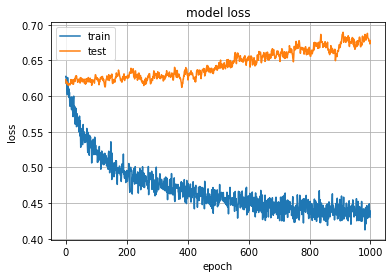

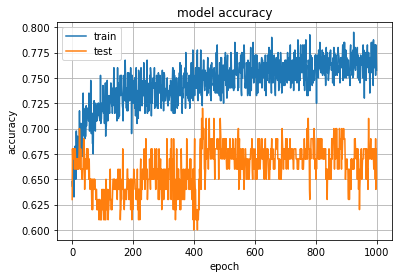

In [113]:
#Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()

#Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()